# Practical for lecture on clustering

Please start with reading task description in <a href="exercise_description.pdf">exercise_description.pdf</a> and watching the video from <a href="CherryBlossoms.mp4 ">CherryBlossoms.mp4</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium as fm

from IPython.core.display import Markdown, display, HTML

In [2]:
# beautify the screen display
%matplotlib inline
pd.options.display.max_columns = 200
#display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
  .rendered_html tr, .rendered_html th,  .rendered_html td {   text-align: right; }  
  .rendered_html :first-child {   text-align: left; } 
  .rendered_html :last-child {   text-align: left; }
  </style>"""))

# Tweak default output of pyplots
screen_dpi = plt.rcParams['figure.dpi']
# 'figsize' is in inches, so convert desired default figure size in pixels into inches using the given sceen dpi 
plt.rcParams["figure.figsize"] = [800/screen_dpi,600/screen_dpi]

In [3]:
# Use in-line date string conversion/parsing, it is significantly more effective than applying pd.to_datetime() on a dataframe column post-loading
def dt_parse(timestamp_str):
    return pd.to_datetime(timestamp_str, format='%Y%m%d %H:%M:%S', errors='coerce')

# Loading data

The folder includes 3 data sets of different size:

    cherryblossom_USA_filtered.csv: 10 years of data
    cherryblossom_2012-2017.csv: 6 years of data
    cherryblossom_2012-2014.csv: 3 years of data
    
 More data slows down clustering and may cause problems for visualization on some computers

In [4]:
#events = pd.read_csv('cherryblossom_2012-2017.csv', sep=',', decimal='.', header=0, index_col='PhotoID', parse_dates=['DateTaken'], date_parser=dt_parse)
#events = pd.read_csv('cherryblossom_USA_filtered.csv', sep=',', decimal='.', header=0, index_col='PhotoID', parse_dates=['DateTaken'], date_parser=dt_parse)
events = pd.read_csv('cherryblossom_2012-2014.csv', sep=',', decimal='.', header=0, index_col='PhotoID', parse_dates=['DateTaken'], date_parser=dt_parse)
events.describe()

longitude     latitude          Views           prID  \
count  3337.000000  3337.000000    3337.000000    3337.000000   
mean    -92.018507    40.937699     852.043452   44814.014384   
std      21.141105     4.245330    7407.892366   34073.558563   
min    -130.595200    19.308035       1.000000       3.000000   
25%    -122.261940    38.883015      70.000000   14139.000000   
50%     -77.050598    38.969116     168.000000   37035.000000   
75%     -77.026711    43.643593     445.000000   78616.000000   
max     -52.746906    53.651505  380184.000000  110841.000000   

       Sequential number  Distance from the previous point (km)  \
count        3337.000000                             245.000000   
mean            1.498352                              54.415373   
std            12.280620                             432.935968   
min             0.000000                               1.006258   
25%             0.000000                               1.303313   
50%             0.000000                               1.588933   
75%             0.000000                               2.948318   
max           324.000000                            3935.175669   

       DateTaken: year  DateTaken: month  DateTaken: day of year  \
count      3337.000000       3337.000000             3337.000000   
mean       2012.860354          3.902307              103.014384   
std           0.763944          1.333725               39.322512   
min        2012.000000          1.000000                1.000000   
25%        2012.000000          3.000000               84.000000   
50%        2013.000000          4.000000               99.000000   
75%        2013.000000          4.000000              110.000000   
max        2014.000000         12.000000              362.000000   

       DateTaken: week of year  Days since 01/01/2007  
count              3337.000000            3337.000000  
mean                 15.343422            2243.230560  
std                   5.648646             286.767894  
min                   1.000000            1826.000000  
25%                  13.000000            1924.510000  
50%                  15.000000            2287.550000  
75%                  16.000000            2375.800000  
max                  52.000000            2896.590000

In [5]:
events.head()

Owner         UserID DateTaken   longitude  \
PhotoID                                                                  
13727525123               weiball  100374614@N05       NaT -123.195915   
9577728064       Jonathan Lederer  100438297@N07       NaT  -73.130814   
13389200105      Jonathan Lederer  100438297@N07       NaT  -73.130493   
13590066203  John Martin Andresen   10078440@N07       NaT -122.207840   
13903519904  John Martin Andresen   10078440@N07       NaT -122.205544   

              latitude           UploadDate  Views                 NAME  \
PhotoID                                                                   
13727525123  49.125679  09/04/2014 00:31:02    395         Tree of Hope   
9577728064   40.923523  23/08/2013 14:19:18     67       Cherry Blossom   
13389200105  40.924049  24/03/2014 21:12:16    102  Spring is coming...   
13590066203  47.857834  02/04/2014 21:57:54     28       SAKURA4-2-2014   
13903519904  47.855762  16/04/2014 21:44:24     22           Mill Creek   

                                                           URL  \
PhotoID                                                          
13727525123  https://farm8.staticflickr.com/7352/1372752512...   
9577728064   https://farm4.staticflickr.com/3734/9577728064...   
13389200105  https://farm8.staticflickr.com/7351/1338920010...   
13590066203  https://farm3.staticflickr.com/2853/1359006620...   
13903519904  https://farm8.staticflickr.com/7326/1390351990...   

                                                          Tags  \
PhotoID                                                          
13727525123  ;park;city;travel;vacation;sky;canada;tree;nat...   
9577728064         ;sky;nature;beautiful;pretty;cherryblossom;   
13389200105  ;pink;tree;spring;blossom;rosa;cherryblossom;b...   
13590066203                  ;sakura;cherryblossoms;millcreek;   
13903519904  ;cherryblossom;sakura;millcreek;flickrandroida...   

                                    MTags   prID  Sequential number  \
PhotoID                                                               
13727525123                           NaN  15238                  0   
9577728064                            NaN   1170                  0   
13389200105                           NaN   1169                  0   
13590066203                           NaN  12486                  0   
13903519904  flickrandroidapp:filter=none    566                  0   

             Distance from the previous point (km)  DateTaken: year  \
PhotoID                                                               
13727525123                                    NaN             2014   
9577728064                                     NaN             2013   
13389200105                                    NaN             2013   
13590066203                                    NaN             2014   
13903519904                                    NaN             2014   

             DateTaken: month DateTaken: date  DateTaken: day of year  \
PhotoID                                                                 
13727525123                 4      08.04.2014                      98   
9577728064                  5      05.05.2013                     125   
13389200105                 4      15.04.2013                     105   
13590066203                 4      02.04.2014                      92   
13903519904                 4      16.04.2014                     106   

             DateTaken: week of year  Days since 01/01/2007  
PhotoID                                                      
13727525123                       15                2654.11  
9577728064                        19                2316.68  
13389200105                       16                2296.43  
13590066203                       14                2648.62  
13903519904                       16                2662.59

# Overview of spatial distribution: showing all events on map

if you receive the following error message
<pre>
   IOPub data rate exceeded.
   The notebook server will temporarily stop sending output
   to the client in order to avoid crashing it.
   To change this limit, set the config variable
   `--NotebookApp.iopub_data_rate_limit`.
</pre>   
please re-start Jupyter Notebook with extra parameters:
   
   <pre>jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000</pre>
   
## For a list of available map tiles, see https://deparkes.co.uk/2016/06/10/folium-map-tiles/
   

In [6]:
lon_range = (-130.60, -52.75)
lat_range = (17.13, 53.65)
m = fm.Map(tiles='cartodbpositron', width='80%', height='80%') # If you adjusted the notebook display width to be as wide as your screen, the map might get very big. Adjust size as desired.
m.fit_bounds([[lat_range[0], lon_range[0]], [lat_range[1], lon_range[1]]])

for id, row in events.iterrows():
    fm.CircleMarker((row.latitude, row.longitude), radius=2, color='#0000FF0D', fill=False).add_to(m)

m

# Overview of temporal dynamics

in space-time 3D representation (a minimalistic space-time-cube)

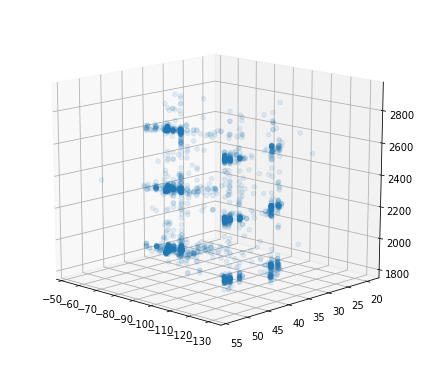

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(6, 5))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134) # change parameters here for experimenting
ax.scatter(events['longitude'], events['latitude'], events['Days since 01/01/2007'], alpha=0.1)
plt.show()

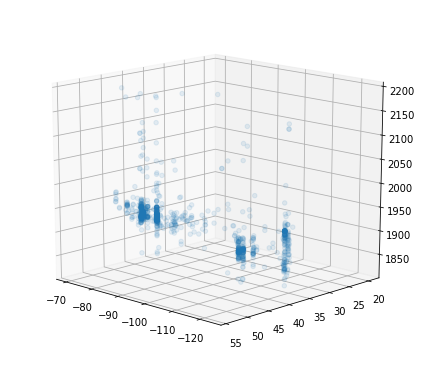

In [8]:
fig = plt.figure(1, figsize=(6, 5))
events_1year=events[events['DateTaken: year']==2012]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134) # change parameters here for experimenting
ax.scatter(events_1year['longitude'], events_1year['latitude'], events_1year['Days since 01/01/2007'], alpha=0.1)
plt.show()

# Preparation for DBScan clustering followed by visualization of its results

In [9]:
from sklearn.cluster import DBSCAN as dbscan
import math
# 12-step qualitative color scale, courtesy of www.colorbrewer2.org
clust_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

# Defaults for DBScan

In [10]:
kms_per_radian = 6371.0088
spatial_dist_max = 20 / kms_per_radian
temporal_dist_max = 7

# Here we define similarity measures: spatial and spatio-temporal distances 

Both use great_circle distance between two points specified by their coordinates. Note that we optimize the code for eliminating unnecessary computations of spatial distances.

In [11]:
def great_circle(lat1, long1, lat2, long2):

    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0
        
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
        
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
    
    # Compute spherical distance from spherical coordinates.
        
    # For two locations in spherical coordinates 
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) = 
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + 
           math.cos(phi1)*math.cos(phi2))
    
    if (cos > 1.0):
        cos = 1.0

    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth 
    # in your favorite set of units to get length.
    return arc

def SpaceDistance(x,y):
    try:
        gc_dist = great_circle(x[1],x[0],y[1],y[0])
    except ValueError:
        gc_dist = np.Infinity
    
    if (gc_dist>spatial_dist_max):
        return np.Infinity
    else:
        return gc_dist
    #return great_circle(x[1],x[0],y[1],y[0])

def SpaceTimeDistance(x,y):
    #print('Params = {},{}'.format(spatial_dist_max,temporal_dist_max))
    diff_days = math.fabs(x[2] - y[2])
    if (np.isnan(diff_days) or diff_days > temporal_dist_max):
        return np.Infinity
    
    try:
        gc_dist = great_circle(x[1],x[0],y[1],y[0])
    except ValueError:
        #print(x[1],x[0],y[1],y[0])
        gc_dist = np.Infinity
    
    if (gc_dist>spatial_dist_max):
        return np.Infinity
    
    ratio_t=diff_days/temporal_dist_max
    ratio_d=gc_dist/spatial_dist_max
    if (ratio_d>ratio_t):
        return gc_dist
    else:
        return ratio_t * spatial_dist_max

# Running space-time clustering

You may want to modify parameters and then run the following cells for assessing clusters.

We have test the following sets of parameters:

spatial_dist_max = 30 / kms_per_radian; temporal_dist_max = 3; min_samples=3

spatial_dist_max = 30 / kms_per_radian; temporal_dist_max = 7; min_samples=3

spatial_dist_max = 20 / kms_per_radian; temporal_dist_max = 7; min_samples=3

spatial_dist_max = 20 / kms_per_radian; temporal_dist_max = 7; min_samples=7

In [12]:
spatial_dist_max = 30 / kms_per_radian
temporal_dist_max = 3
from sklearn.cluster import DBSCAN
clustered = DBSCAN(metric=SpaceTimeDistance, min_samples=3).fit(events[['longitude','latitude','Days since 01/01/2007']])
labels=clustered.labels_
unique_labels=np.unique(clustered.labels_)
print('Clusters: -1 for noise consisting of {} records and {} clusters labelled as 0..{}'.format(events[labels==-1].shape[0], len(unique_labels)-1, len(unique_labels)-2))
#clustered
clust_id_col_name='ClusterN'
events[clust_id_col_name]=labels

Clusters: -1 for noise consisting of 890 records and 107 clusters labelled as 0..106


# Compute aggregates for the clusters

In [13]:
agg_func = {
    'URL':'count',
    'Days since 01/01/2007':['max','min'],
    'longitude':['mean','max','min'],
    'latitude':['mean','max','min']
}
st_aggregates = events.reset_index(drop=False)[['ClusterN','URL','Days since 01/01/2007','longitude','latitude']].groupby(['ClusterN']).agg(agg_func)
# Flatten hierarchical column names
st_aggregates.columns = ["_".join(x) for x in st_aggregates.columns.ravel()]
# compute derived attributes: duration and bounding rectangle diagonal
st_aggregates['duration (days)']=st_aggregates['Days since 01/01/2007_max']-st_aggregates['Days since 01/01/2007_min']
for id,row in st_aggregates.iterrows():
    brd=kms_per_radian*great_circle(row['latitude_max'],row['longitude_max'],row['latitude_min'],row['longitude_min'])
    #print('{}'.format(brd))
    st_aggregates.at[id,'Bound_rect_diag(km)']=brd
st_aggregates

URL_count  Days since 01/01/2007_max  Days since 01/01/2007_min  \
ClusterN                                                                    
-1              890                    2896.59                    1826.00   
 0               59                    2661.57                    2641.75   
 1               38                    2652.55                    2627.89   
 2              238                    2668.82                    2647.80   
 3              397                    2302.54                    2269.50   
 4                4                    2659.75                    2658.56   
 5              415                    1932.90                    1894.69   
 6                3                    2633.51                    2630.48   
 7               34                    2302.69                    2299.52   
 8              120                    2319.81                    2286.52   
 9               32                    2303.78                    2291.61   
 10              52                    2286.53                    2273.42   
 11              36                    2311.85                    2292.58   
 12             100                    1937.62                    1901.97   
 13              57                    2326.49                    2312.26   
 14              52                    1935.84                    1919.50   
 15              19                    2639.48                    2630.54   
 16               3                    2659.51                    2657.55   
 17              13                    2698.45                    2688.56   
 18              72                    2285.41                    2267.44   
 19               9                    2246.67                    2239.47   
 20               6                    2312.61                    2303.78   
 21              79                    2691.37                    2659.68   
 22               7                    2678.27                    2675.82   
 23               9                    2672.52                    2667.53   
 24               3                    1938.49                    1937.52   
 25               3                    2578.41                    2575.65   
 26               3                    2585.78                    2585.73   
 27              62                    1933.81                    1905.76   
 28              10                    2641.62                    2636.54   
...             ...                        ...                        ...   
 77               3                    2700.39                    2698.42   
 78               6                    2275.97                    2273.41   
 79               3                    1919.07                    1916.76   
 80               4                    2314.75                    2312.58   
 81               3                    2675.74                    2672.66   
 82               4                    2287.59                    2282.54   
 83               3                    2302.61                    2301.53   
 84               9                    1911.86                    1907.34   
 85               5                    1871.62                    1867.56   
 86               3                    1923.70                    1922.57   
 87               3                    2292.52                    2290.55   
 88               7                    2273.60                    2266.54   
 89               3                    2368.95                    2367.00   
 90               3                    1909.37                    1905.71   
 91               3                    2321.43                    2317.60   
 92               3                    1946.45                    1942.56   
 93               4                    1952.58                    1948.62   
 94               4                    1918.84                    1915.94   
 95               3                    2357.60                    2354.74   
 96   

In [14]:
lon_range = (-130.60, -52.75)
lat_range = (17.13, 53.65)
m = fm.Map(tiles='cartodbpositron', width='100%', height='100%') # If you adjusted the notebook display width to be as wide as your screen, the map might get very big. Adjust size as desired.
m.fit_bounds([[lat_range[0], lon_range[0]], [lat_range[1], lon_range[1]]])
for id, row in events.iterrows():
    cluster_id = row[clust_id_col_name]
    if (row[clust_id_col_name] != -1):
        fm.CircleMarker((row['latitude'], row['longitude']), radius=2, color=clust_colors[row[clust_id_col_name]%len(clust_colors)], fill=False, popup='Cluster: {}'.format(row[clust_id_col_name])).add_to(m) 
m

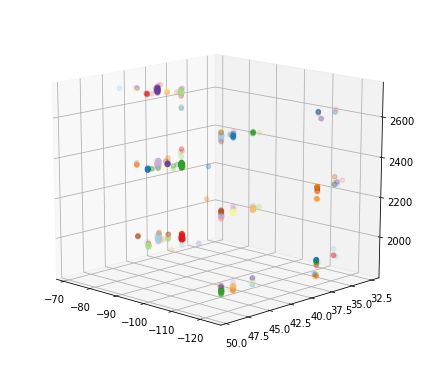

In [15]:
fig = plt.figure(1, figsize=(6, 5))
for id,row in events.iterrows():
    cluster_id = row[clust_id_col_name]
    if (cluster_id==-1):
        color='#000000'
    else:
        color=clust_colors[cluster_id % len(clust_colors)]
    events.at[id,'colors']=color
eventsnn = events[events[clust_id_col_name] != -1] # no noise 
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134) # change parameters here for experimenting
ax.scatter(eventsnn['longitude'], eventsnn['latitude'], eventsnn['Days since 01/01/2007'], c=eventsnn['colors'], alpha=0.1)
plt.show()

noise data, shape=(890, 22)


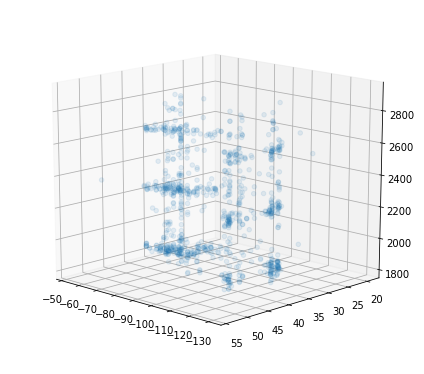

In [16]:
events_noise = events[events[clust_id_col_name] == -1]
print('noise data, shape={}'.format(events_noise.shape))
fig = plt.figure(1, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134) # change parameters here for experimenting
ax.scatter(events_noise['longitude'], events_noise['latitude'], events_noise['Days since 01/01/2007'], alpha=0.1)
plt.show()

# Now we extract non-noise data to a new table and then run DBScan with spatial similarity measure

Now we ignore times!

no noise data, shape=(2447, 22)


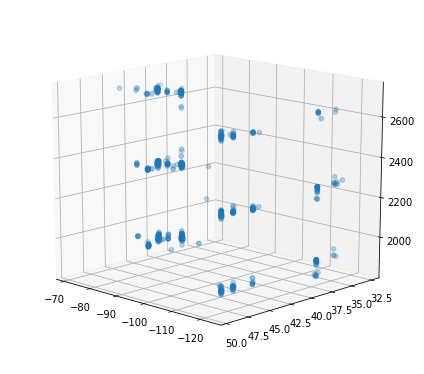

In [17]:
eventsnn = events[events[clust_id_col_name] != -1]
print('no noise data, shape={}'.format(eventsnn.shape))
fig = plt.figure(1, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134) # change parameters here for experimenting
ax.scatter(eventsnn['longitude'], eventsnn['latitude'], eventsnn['Days since 01/01/2007'], alpha=0.1)
plt.show()

# Space clustering followed by map visualization

In [18]:
spatial_dist_max = 20 / kms_per_radian
clustered = DBSCAN(metric=SpaceDistance, min_samples=7).fit(eventsnn[['longitude','latitude']])
labels=clustered.labels_
unique_labels=np.unique(clustered.labels_)
print('Clusters: -1 for noise consisting of {} records and {} clusters labelled as 0..{}'.format(eventsnn[labels==-1].shape[0], len(unique_labels)-1, len(unique_labels)-2))
clust_id_col_name='ClusterNN'
eventsnn[clust_id_col_name]=labels
#clustered
m = fm.Map(tiles='cartodbpositron', width='100%', height='100%') # If you adjusted the notebook display width to be as wide as your screen, the map might get very big. Adjust size as desired.
m.fit_bounds([[lat_range[0], lon_range[0]], [lat_range[1], lon_range[1]]])
for id, row in eventsnn.iterrows():
    cluster_id = row[clust_id_col_name]
    if (row[clust_id_col_name] != -1):
        fm.CircleMarker((row['latitude'], row['longitude']), radius=2, color=clust_colors[row[clust_id_col_name]%len(clust_colors)], fill=False, popup='Cluster: {}'.format(row[clust_id_col_name])).add_to(m) 
m

Clusters: -1 for noise consisting of 61 records and 14 clusters labelled as 0..13


C:\Users\gandri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


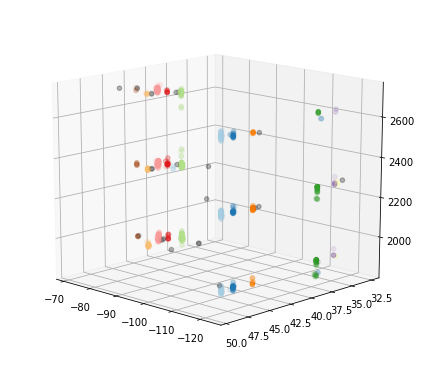

In [19]:
fig = plt.figure(1, figsize=(6, 5))
for id,row in eventsnn.iterrows():
    cluster_id = row[clust_id_col_name]
    if (cluster_id==-1):
        color='#000000'
    else:
        color=clust_colors[cluster_id % len(clust_colors)]
    eventsnn.at[id,'colors']=color
#eventsnn = events[events[clust_id_col_name] != -1] # no noise 
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134) # change parameters here for experimenting
ax.scatter(eventsnn['longitude'], eventsnn['latitude'], eventsnn['Days since 01/01/2007'], c=eventsnn['colors'], alpha=0.1)
plt.show()

In [20]:
agg_func = {
    'URL':'count',
    'Days since 01/01/2007':['max','min'],
    'longitude':['mean','max','min'],
    'latitude':['mean','max','min']
}
st_aggregates = eventsnn.reset_index(drop=False)[['ClusterNN','URL','Days since 01/01/2007','longitude','latitude']].groupby(['ClusterNN']).agg(agg_func)
# Flatten hierarchical column names
st_aggregates.columns = ["_".join(x) for x in st_aggregates.columns.ravel()]
st_aggregates['duration (days)']=st_aggregates['Days since 01/01/2007_max']-st_aggregates['Days since 01/01/2007_min']
for id,row in st_aggregates.iterrows():
    brd=kms_per_radian*great_circle(row['latitude_max'],row['longitude_max'],row['latitude_min'],row['longitude_min'])
    st_aggregates.at[id,'Bound_rect_diag(km)']=brd
st_aggregates

URL_count  Days since 01/01/2007_max  Days since 01/01/2007_min  \
ClusterNN                                                                    
-1                61                    2708.20                    1867.66   
 0               248                    2678.27                    1905.76   
 1               154                    2659.51                    1901.54   
 2              1090                    2675.74                    1868.80   
 3               168                    2669.18                    1854.49   
 4               318                    2700.39                    1896.45   
 5                84                    2672.65                    1907.60   
 6               128                    2698.45                    1919.50   
 7               113                    2639.48                    1907.34   
 8                16                    2638.46                    1906.52   
 9                13                    2638.66                    1906.48   
 10               10                    2272.75                    1896.56   
 11               29                    2693.47                    1930.52   
 12                8                    2330.35                    2312.34   
 13                7                    2630.61                    1868.64   

           longitude_mean  longitude_max  longitude_min  latitude_mean  \
ClusterNN                                                                
-1             -91.055554     -70.951294    -123.031860      41.864831   
 0            -123.109451    -122.809502    -123.272278      49.259307   
 1            -122.310072    -122.086670    -122.629997      47.651889   
 2             -77.041715     -76.751007     -77.418015      38.889008   
 3            -122.414739    -122.126808    -122.482536      37.788607   
 4             -73.987269     -73.557953     -74.457390      40.739395   
 5             -75.185953     -74.882835     -75.392174      39.981967   
 6             -79.463220     -79.303894     -79.758186      43.652748   
 7            -122.687839    -122.540520    -122.957497      45.526539   
 8            -118.177386    -118.111832    -118.260719      34.129155   
 9            -118.493045    -118.480530    -118.500496      34.181425   
 10           -118.062340    -117.918999    -118.343674      33.736968   
 11            -71.106044     -71.064835     -71.139000      42.349474   
 12            -83.447274     -83.388336     -83.522369      41.917762   
 13           -122.039540    -121.903229    -122.170845      37.338938   

           latitude_max  latitude_min  duration (days)  Bound_rect_diag(km)  
ClusterNN                                                                    
-1            49.159710     32.716110           840.54          4633.154363  
 0            49.374321     49.053028           772.51            49.053953  
 1            47.995152     47.420540           757.97            75.730649  
 2            39.138176     38.709625           806.94            74.834202  
 3            37.991570     37.722221           814.69            43.270799  
 4            41.004333     40.439865           803.94            98.411058  
 5            40.141846     39.854527           765.05            53.880434  
 6            43.872234     43.590187           778.95            48.124359  
 7            45.679882     45.473679           732.14            39.736336  
 8            34.209263     34.057388           731.94            21.748176  
 9            34.183483     34.180458           732.18             1.867172  
 10           33.812332     33.702530           376.19            41.114723  
 11           42.397846     42.301819           762.95            12.294758  
 12           41.926212     41.915001            18.01            11.159366  
 13           37.426991     37.251987           761.97            30.633577

In [21]:
agg_func = {
    'URL':'count',
    'DateTaken: day of year':['max','min'],
    'longitude':['mean'],
    'latitude':['mean']
}
st_aggregates = eventsnn.reset_index(drop=False)[['ClusterNN','DateTaken: year','URL','DateTaken: day of year','longitude','latitude']].groupby(['ClusterNN','DateTaken: year']).agg(agg_func)
# Flatten hierarchical column names
st_aggregates.columns = ["_".join(x) for x in st_aggregates.columns.ravel()]
st_aggregates['duration (days)']=st_aggregates['DateTaken: day of year_max']-st_aggregates['DateTaken: day of year_min']
st_aggregates

URL_count  DateTaken: day of year_max  \
ClusterNN DateTaken: year                                          
-1        2012                    21                         123   
          2013                    22                         130   
          2014                    18                         152   
 0        2012                    74                         127   
          2013                    88                         120   
          2014                    86                         122   
 1        2012                    52                         121   
          2013                    61                         121   
          2014                    41                         103   
 2        2012                   426                         119   
          2013                   407                         177   
          2014                   257                         119   
 3        2012                    79                         117   
          2013                    71                         111   
          2014                    18                         113   
 4        2012                   111                         122   
          2013                   125                         128   
          2014                    82                         144   
 5        2012                    23                         107   
          2013                    43                         138   
          2014                    18                         116   
 6        2012                    58                         124   
          2013                    57                         135   
          2014                    13                         142   
 7        2012                    21                         117   
          2013                    73                         101   
          2014                    19                          83   
 8        2012                     4                         113   
          2013                     8                         111   
          2014                     4                          82   
 9        2012                     4                          84   
          2013                     7                          82   
          2014                     2                          82   
 10       2012                     3                          73   
          2013                     7                          81   
 11       2012                    10                         111   
          2013                    15                         123   
          2014                     4                         137   
 12       2013                     8                         139   
 13       2012                     3                          46   
          2014                     4                          74   

                           DateTaken: day of year_min  longitude_mean  \
ClusterNN DateTaken: year                                               
-1        2012                                     42      -89.236984   
          2013                                     76      -99.594358   
          2014                                     74      -82.740904   
 0        2012                                     80     -123.122891   
          2013                                     75     -123.112271   
          2014                                     71     -123.095000   
 1        2012                                     76     -122.309097   
          2013                                     82     -122.315419   
          2014                                     71     -122.303355   
 2        2012                                     43      -77.043978   
          2013                                     78      -77.039173   
          2014                                     19      -77.041991   
 3        2012                                     29     -122.406630   
       

In [22]:
agg_func = {
    'URL':'count',
    'DateTaken: day of year':['max','min'],
    'longitude':['mean'],
    'latitude':['mean']
}
st_aggregates = eventsnn.reset_index(drop=False)[['ClusterNN','DateTaken: year','URL','DateTaken: day of year','longitude','latitude']].groupby(['DateTaken: year','ClusterNN']).agg(agg_func)
# Flatten hierarchical column names
st_aggregates.columns = ["_".join(x) for x in st_aggregates.columns.ravel()]
st_aggregates['duration (days)']=st_aggregates['DateTaken: day of year_max']-st_aggregates['DateTaken: day of year_min']
st_aggregates

URL_count  DateTaken: day of year_max  \
DateTaken: year ClusterNN                                          
2012            -1                21                         123   
                 0                74                         127   
                 1                52                         121   
                 2               426                         119   
                 3                79                         117   
                 4               111                         122   
                 5                23                         107   
                 6                58                         124   
                 7                21                         117   
                 8                 4                         113   
                 9                 4                          84   
                 10                3                          73   
                 11               10                         111   
                 13                3                          46   
2013            -1                22                         130   
                 0                88                         120   
                 1                61                         121   
                 2               407                         177   
                 3                71                         111   
                 4               125                         128   
                 5                43                         138   
                 6                57                         135   
                 7                73                         101   
                 8                 8                         111   
                 9                 7                          82   
                 10                7                          81   
                 11               15                         123   
                 12                8                         139   
2014            -1                18                         152   
                 0                86                         122   
                 1                41                         103   
                 2               257                         119   
                 3                18                         113   
                 4                82                         144   
                 5                18                         116   
                 6                13                         142   
                 7                19                          83   
                 8                 4                          82   
                 9                 2                          82   
                 11                4                         137   
                 13                4                          74   

                           DateTaken: day of year_min  longitude_mean  \
DateTaken: year ClusterNN                                               
2012            -1                                 42      -89.236984   
                 0                                 80     -123.122891   
                 1                                 76     -122.309097   
                 2                                 43      -77.043978   
                 3                                 29     -122.406630   
                 4                                 71      -73.981376   
                 5                                 82      -75.192362   
                 6                                 94      -79.455959   
                 7                                 82     -122.701823   
                 8                                 81     -118.147346   
                 9                                 81     -118.493053   
                 10                                71     -118.143435   
                 11                               105      -71.115161   
       

# What's next?

You have two kinds of aggregates that allow you to answer the analytical questions about (1) local dynamics in clusters and (2) dynamics of the overall spatial situations. You may use, for example, contour plots for showing isochrones of season start at a single year, see https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html 